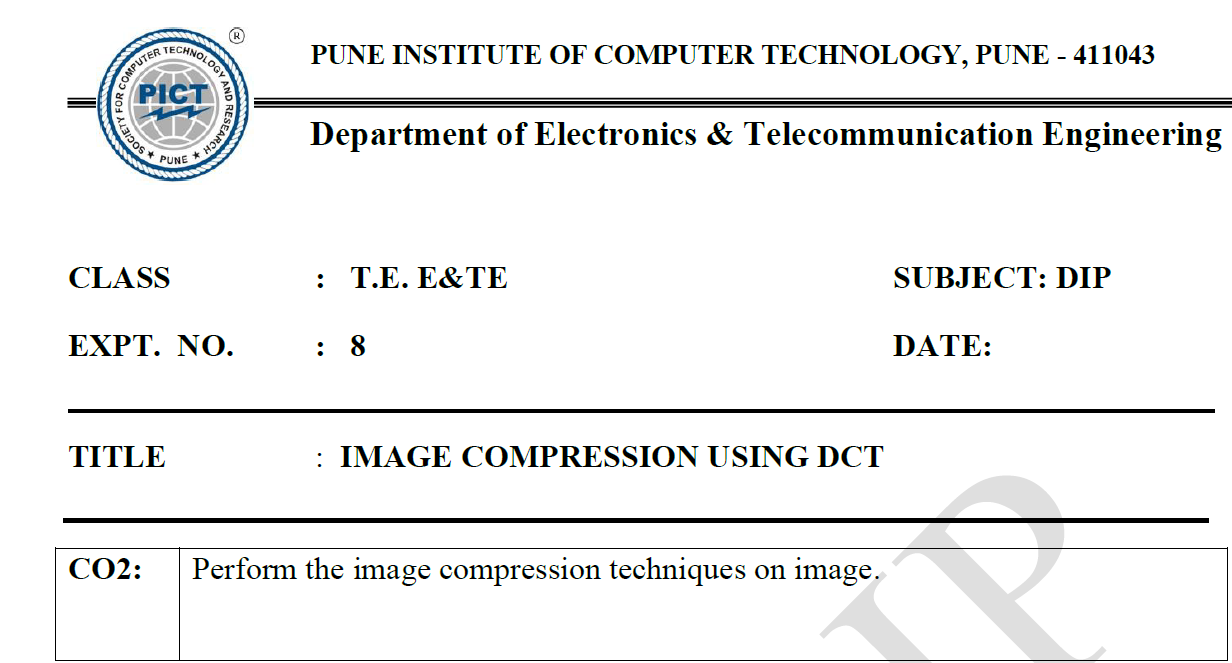

In [ ]:
from VisionCraft.vision.utils import imShow, imRead
import numpy as np

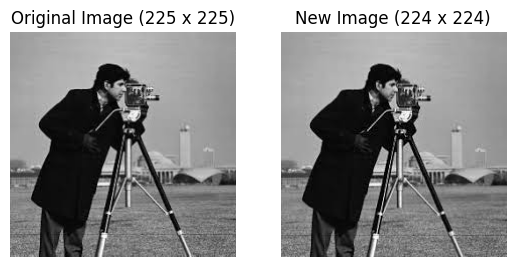

In [ ]:
img = imRead(path="./camaeraMan.jpeg")
height, width = img.shape
new_height = height - (height % 8)
new_width = width - (width % 8)
imShow(title=f"Original Image ({height} x {width})", img=img, subplot=True, row=1, col=2, num=1)
img = img[:new_height, :new_width]
imShow(title=f"New Image ({new_height} x {new_width})", img=img, subplot=True, row=1, col=2, num=2)

## 1. DCT

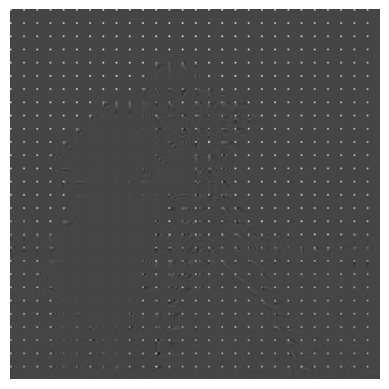

In [ ]:
def dct2D(block, N = 8):
    DCT_matrix = np.zeros((N, N))
    for u in range(N):
        for v in range(N):
            au = (1/(N))**0.5 if u == 0 else (2/(N))**0.5
            av = (1/(N))**0.5 if v == 0 else (2/(N))**0.5
            dct_sum = 0
            for x in range(N):
                for y in range(N):
                    dct_sum += block[x, y] * np.cos(((2 * x + 1) * u * np.pi) / (2 * N)) * np.cos(((2 * y + 1) * v * np.pi) / (2 * N))
            DCT_matrix[u, v] = au * av * dct_sum
    return DCT_matrix


blocks = [img[i:i+8, j:j+8] for i in range(0, new_height, 8) for j in range(0, new_width, 8)]


dct_blocks = [dct2D(block) for block in blocks]

new_img = np.zeros((new_height, new_width))
idx = 0
for i in range(0, new_height, 8):
    for j in range(0, new_width, 8):
        new_img[i:i+8, j:j+8] = dct_blocks[idx]
        idx += 1


new_img = np.round(new_img)

imShow(img=new_img)


## 2. IDCT

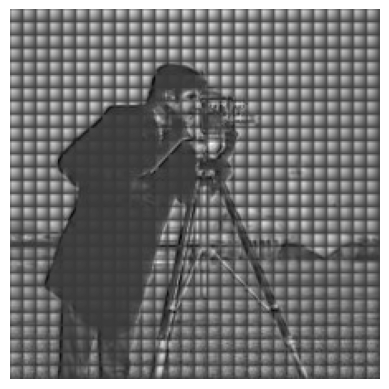

In [ ]:
def idct2D(block, N = 8):
    IDCT_matrix = np.zeros((N, N))
    for u in range(N):
        for v in range(N):
            au = (1/(N))**0.5 if u == 0 else (2/(N))**0.5
            av = (1/(N))**0.5 if v == 0 else (2/(N))**0.5
            idct_sum = 0
            for x in range(N):
                for y in range(N):
                    idct_sum += block[x, y] * np.cos(((2 * x + 1) * u * np.pi) / (2 * N)) * np.cos(((2 * y + 1) * v * np.pi) / (2 * N))
            IDCT_matrix[u, v] = au * av * idct_sum
    return IDCT_matrix


blocks = [new_img[i:i+8, j:j+8] for i in range(0, new_height, 8) for j in range(0, new_width, 8)]

idct_blocks = [dct2D(block) for block in blocks]

og_img = np.zeros((new_height, new_width))
idx = 0
for i in range(0, new_height, 8):
    for j in range(0, new_width, 8):
        og_img[i:i+8, j:j+8] = idct_blocks[idx]
        idx += 1


og_img = np.round(og_img)

imShow(img=og_img)


In [ ]:
thresh = 0.1
img_thresh = new_img * (np.absolute(new_img) > thresh*np.max(np.absolute(new_img)))
frac_nonzero = np.sum(img_thresh != 0.0)/img.size
print("Keeping %.2f%% of DCT coefficients"%(100*frac_nonzero))
print('Compression ratio: %.1f:1'%(1/frac_nonzero))

MSE = np.sum((img-og_img)**2)/img.size
PSNR = 10*np.log10(np.max(img)**2/MSE)
print(f'PSNR: {round(PSNR)} db')

Keeping 1.85% of DCT coefficients
Compression ratio: 54.0:1
PSNR: 11 db
